# PhonePe Python Case Study 

This case study focuses on analyzing transaction data from the financial application PhonePe, along with demographic data across various states and districts in India. The primary goal is to uncover insights into transaction trends, user behavior, device usage, and demographic correlations while ensuring data consistency.

Following are the learning outcomes of this case study - 

1. Loading and understanding data
2. Exploratory Data Analysis (EDA)
3. Data Quality Checks
4. Data Merging and Advanced Analysis
5. Data Visualisation
6. Data insights and conclusion

#### Some basic steps

In [4]:
#importing libraries used in the case study

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

#### Following step is optional. As the datasets used are quite long, the following lines of code help with partial data display issues.

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows if needed
pd.set_option('display.max_colwidth', None) # Show long text fully
pd.set_option('display.expand_frame_repr', False) # Prevent splitting of columns

## 1. Loading all datasets 
The excel file 'phonepe_dataset.xlsx' contains 5 sheets. Each sheet corresponds to a dataset.

In [7]:
state_txn = pd.read_excel('phonepe_dataset.xlsx', sheet_name = 'State_Txn and Users')
state_txn_type = pd.read_excel('phonepe_dataset.xlsx', sheet_name = 'State_TxnSplit')
state_device_data = pd.read_excel('phonepe_dataset.xlsx', sheet_name = 'State_DeviceData')
district_txn = pd.read_excel('phonepe_dataset.xlsx', sheet_name = 'District_Txn and Users')
district_demo = pd.read_excel('phonepe_dataset.xlsx', sheet_name = 'District Demographics')

#### Looking at the dataset

Looking at the first and last few rows of dataset, every nth row and the middle rows. This provides us the first insight into what kind of data is there in the datasets.

In [12]:
# top 5 rows of state_txn

state_txn.head(5)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [14]:
# bottom 10 rows of state_txn_type

state_txn_type.tail(10)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


In [738]:
# middle 10 rows of state_device_data

start = len(state_device_data) // 2
middle_rows = state_device_data.iloc[start:start+10]
middle_rows

,State,Year,Quarter,Brand,Registered Users,Percentage
2772,Lakshadweep,2018,1,Samsung,102,0.203593
2773,Lakshadweep,2018,1,Xiaomi,100,0.199601
2774,Lakshadweep,2018,1,Vivo,67,0.133733
2775,Lakshadweep,2018,1,Oppo,56,0.111776
2776,Lakshadweep,2018,1,Huawei,25,0.049900
2777,Lakshadweep,2018,1,OnePlus,22,0.043912
2778,Lakshadweep,2018,1,Apple,20,0.039920
2779,Lakshadweep,2018,1,Realme,20,0.039920
2780,Lakshadweep,2018,1,Gionee,12,0.023952
2781,Lakshadweep,2018,1,COOLPAD,10,0.019960


In [20]:
# every 10th row of district_demo

district_demo.iloc[::10]

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.0,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.0,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.0,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.0,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.0,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.0,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.0,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.0,14557,DL04,North


#### Display statistics and datatypes of each dataset

To get insights into the kind of data present in a dataset, statistic information and data types of columns is important.

In [35]:
dfs = {"State Transaction":state_txn,
       "State Transaction Types": state_txn_type,
       "State Device Type": state_device_data, 
       "District Transaction": district_txn,
       "District Demography": district_demo}

for name, df in dfs.items():
    print(f"Description of {name} Dataset:\n{df.describe()}\n")

Description of State Transaction Dataset:
              Year     Quarter  Transactions  Amount (INR)    ATV (INR)  \
count   504.000000  504.000000  5.040000e+02  5.030000e+02   504.000000   
mean   2019.285714    2.357143  4.074000e+07  7.083332e+10  1993.471543   
std       1.031181    1.109971  8.228714e+07  1.440902e+11   607.464894   
min    2018.000000    1.000000  7.780000e+02  1.928611e+06     0.000000   
25%    2018.000000    1.000000  5.925578e+05  1.167157e+09  1598.910667   
50%    2019.000000    2.000000  6.217487e+06  1.051605e+10  1861.380589   
75%    2020.000000    3.000000  4.363675e+07  6.947045e+10  2259.087924   
max    2021.000000    4.000000  5.736165e+08  1.027958e+12  3938.733850   

       Registered Users     App Opens  
count      5.040000e+02  5.040000e+02  
mean       4.777501e+06  9.774471e+07  
std        6.644496e+06  2.042376e+08  
min        5.010000e+02  0.000000e+00  
25%        1.574202e+05  0.000000e+00  
50%        1.747914e+06  2.930574e+06  
75

In [39]:
for name, df in dfs.items():
    print(f"Data Types of {name} Dataset:\n{df.dtypes}\n")

Data Types of State Transaction Dataset:
State                object
Year                  int64
Quarter               int64
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

Data Types of State Transaction Types Dataset:
State                object
Year                  int64
Quarter               int64
Transaction Type     object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
dtype: object

Data Types of State Device Type Dataset:
State                object
Year                  int64
Quarter               int64
Brand                object
Registered Users      int64
Percentage          float64
dtype: object

Data Types of District Transaction Dataset:
State                object
Year                  int64
Quarter               int64
District             object
Code                 object
Transactions          int64
Amount (INR)        float6

#### Identifying missing values

Missing values tend to skew the data and give biased results. Identifying and handling missing values is an important preprocessing step.

In [48]:
for name, df in dfs.items():
    print(f"Missing Values summary of {name} Dataset:\n{df.isnull().sum()}\n")

Missing Values summary of State Transaction Dataset:
State               0
Year                0
Quarter             0
Transactions        0
Amount (INR)        1
ATV (INR)           0
Registered Users    0
App Opens           0
dtype: int64

Missing Values summary of State Transaction Types Dataset:
State               0
Year                0
Quarter             0
Transaction Type    0
Transactions        0
Amount (INR)        0
ATV (INR)           0
dtype: int64

Missing Values summary of State Device Type Dataset:
State               0
Year                0
Quarter             0
Brand               0
Registered Users    0
Percentage          0
dtype: int64

Missing Values summary of District Transaction Dataset:
State                0
Year                 0
Quarter              0
District             0
Code                28
Transactions         0
Amount (INR)         0
ATV (INR)            4
Registered Users     0
App Opens            0
dtype: int64

Missing Values summary of Distr

In [64]:
print("Column with highest missing Values in:")
for name, df in dfs.items():
    print(f"-> {name} Dataset: {df.isnull().mean().idxmax()}")

Column with highest missing Values in:
-> State Transaction Dataset: Amount (INR)
-> State Transaction Types Dataset: State
-> State Device Type Dataset: State
-> District Transaction Dataset: Code
-> District Demography Dataset: State


#### Creating a summary

1. Determining total number of states and districts.
2. Identifying state with highest number of districts.

In [69]:
print("Total unique states:", len(state_txn['State'].unique()), "\nTotal unique districts:", len(district_txn['District'].unique()))

Total unique states: 36 
Total unique districts: 723


In [82]:
print("State with highest number of districts:", district_txn['State'].value_counts().idxmax())

State with highest number of districts: Uttar Pradesh


## 2. Exploratory Data Analysis (EDA)

EDA is used to understand and summarize the main characteristics of a dataset, often using statistical graphics and visualization techniques. 

#### Calculating total number of transactions and total transaction amount for each state over the years

In [122]:
txn_amt = state_txn.groupby(['State','Year']).agg({
    'Amount (INR)' : 'sum', 
    'Transactions' : 'sum'}).sort_values(by = ['Transactions', 'Amount (INR)'], ascending = False)

#### Identifying the top 5 states with the highest transaction volumes and the top 5 states with the lowest transaction volumes

In [137]:
txn_vol = state_txn.groupby('State').agg({'Transactions' : 'sum'}).sort_values(by = 'Transactions', ascending = False)

In [143]:
print("Top 5 states with highest transaction volumes:\n", txn_vol.head(5))

Top 5 states with highest transaction volumes:
                 Transactions
State                       
Karnataka         2981044533
Maharashtra       2833670154
Telangana         2347430243
Andhra Pradesh    1781091169
Rajasthan         1382918930


In [145]:
print("Top 5 states with lowest transaction volumes:\n", txn_vol.tail(5))

Top 5 states with lowest transaction volumes:
                            Transactions
State                                  
Meghalaya                       5648913
Mizoram                         2162776
Ladakh                          1880109
Andaman & Nicobar Islands       1223565
Lakshadweep                       71610


#### Determining the most frequent transaction type for each state and quarter

In [150]:
state_txn_type.groupby(['State','Year','Quarter','Transaction Type']).agg({'Transactions':'sum'})

Transactions
State                     Year Quarter Transaction Type                      
Andaman & Nicobar Islands 2018 1       Financial Services                  33
                                       Merchant payments                  298
                                       Others                             256
                                       Peer-to-peer payments             1871
                                       Recharge & bill payments          4200
...                                                                       ...
West Bengal               2021 2       Financial Services              190537
                                       Merchant payments             41696787
                                       Others                          549353
                                       Peer-to-peer payments         64661051
                                       Recharge & bill payments      34799709

[2514 rows x 1 columns]

#### Identifying the device brand with the highest number of registered users in each state

In [179]:
top_brand = state_device_data.groupby(['State','Brand']).agg({'Registered Users':'sum'}).reset_index()

In [185]:
top_brand.sort_values(['State','Registered Users'], ascending=[True, False])

,State,Brand,Registered Users
11,Andaman & Nicobar Islands,Xiaomi,97889
10,Andaman & Nicobar Islands,Vivo,88408
8,Andaman & Nicobar Islands,Samsung,77065
5,Andaman & Nicobar Islands,Oppo,36007
6,Andaman & Nicobar Islands,Others,33630
...,...,...,...
436,West Bengal,Asus,2775479
438,West Bengal,Huawei,2239841
440,West Bengal,Micromax,1981032
437,West Bengal,Gionee,206751


#### Identifying the district with the highest population in each state

In [196]:
high_pop = district_demo.groupby(['State','District']).agg({'Population':'sum'}).reset_index().sort_values(['State','Population'], ascending = [True,False])

In [792]:
high_pop = high_pop.loc[high_pop.groupby('State')['Population'].idxmax()].sort_values(by='Population', ascending = False)
high_pop['State-District'] = high_pop['State'] + ' - ' + high_pop['District']

#### Column chart depicting the district with the highest population for each state

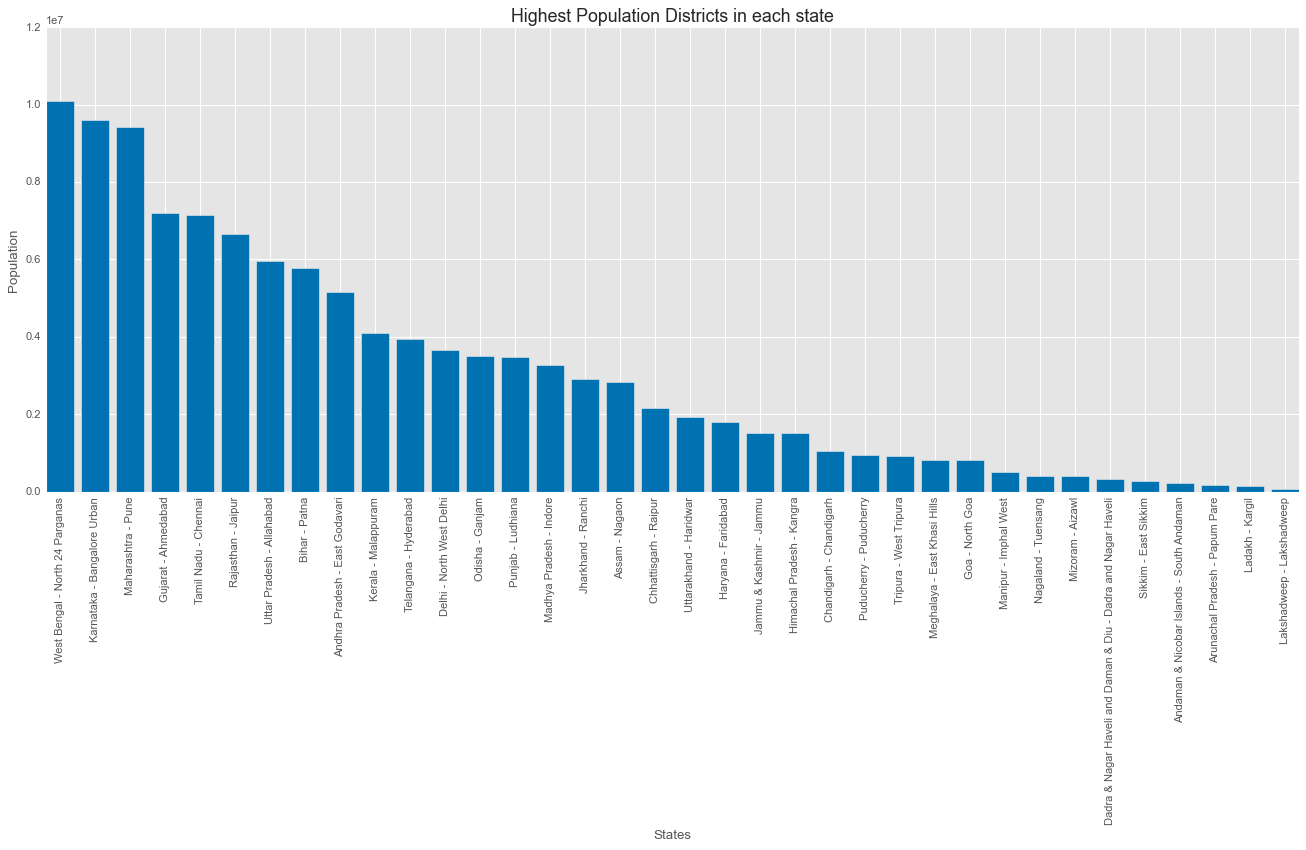

In [794]:
plt.figure(figsize = (18,7))
plt.bar(high_pop['State-District'], high_pop['Population'])
plt.title("Highest Population Districts in each state", fontsize = 16)
plt.xlabel("States", fontsize = 12)
plt.ylabel("Population", fontsize = 12)
plt.xticks(rotation= 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

**1. Densely Populated States**  
West Bengal, Karnataka, and Maharashtra have the most populated districts, indicating large urban centers like Kolkata, Bangalore, and Mumbai driving the population growth.  

**2. Urbanization Impact**  
States with metropolitan cities generally have higher populations in their leading districts, contributing to regional urbanization trends.  

**3. Balanced Population Distribution**  
States like Kerala and Tamil Nadu have moderately high population districts, suggesting relatively balanced urban-rural distribution compared to more centralized urban states.  

**4. Smaller States, Smaller District Populations**  
Union Territories and smaller states like Sikkim, Goa, and Lakshadweep have significantly lower population counts, reflecting geographic size and population density.  

**5. Policy and Infrastructure Implications**  
High population states may require more infrastructural investments and urban planning, while low population states can focus on development opportunities to attract migration and investments.  

#### Compute the average transaction value for each state

In [225]:
state_txn.groupby('State').agg({'ATV (INR)':'mean'}).sort_values(by='ATV (INR)', ascending = False)

,ATV (INR)
State,
Ladakh,3408.222984
Andaman & Nicobar Islands,3159.266422
Mizoram,2927.517802
Lakshadweep,2776.118701
Arunachal Pradesh,2638.323985
Manipur,2621.225756
Nagaland,2609.942590
Jammu & Kashmir,2508.506029
Chandigarh,2113.797075


#### Top 5 states with the highest ATV and the top 5 states with the lowest ATV

In [772]:
print("Top 5 states with highest ATV:\n", state_txn.groupby('State').agg({'ATV (INR)':'mean'}).sort_values(by='ATV (INR)', ascending = False).head(5))

Top 5 states with highest ATV:
                              ATV (INR)
State                                 
Ladakh                     3408.222984
Andaman & Nicobar Islands  3159.266422
Mizoram                    2927.517802
Lakshadweep                2776.118701
Arunachal Pradesh          2638.323985


In [770]:
print("Top 5 states with lowest ATV:\n", state_txn.groupby('State').agg({'ATV (INR)':'mean'}).sort_values(by='ATV (INR)', ascending = False).tail(5))

Top 5 states with lowest ATV:
                                         ATV (INR)
State                                            
Karnataka                             1517.392249
Maharashtra                           1516.361820
Dadra & Nagar Haveli and Daman & Diu  1487.395599
Odisha                                1428.137367
West Bengal                           1373.600590


#### Total number of app opens over the years and quarters for each state 

In [234]:
state_txn.groupby(['State','Year','Quarter']).agg({'App Opens':'sum'})

App Opens
State                     Year Quarter           
Andaman & Nicobar Islands 2018 1                0
                               2                0
                               3                0
                               4                0
                          2019 1                0
...                                           ...
West Bengal               2020 2        198589332
                               3        246554831
                               4        291721919
                          2021 1        316832674
                               2        275341466

[504 rows x 1 columns]

#### Identifying trends in app usage over time for Gujarat state

In [246]:
gujarat_data = state_txn[state_txn['State']=='Gujarat'].groupby(['State','Year','Quarter']).agg({'App Opens':'sum'}).reset_index()
gujarat_data['X-tick'] = gujarat_data['Year'].astype(str) + '-Q' + gujarat_data['Quarter'].astype(str)

In [248]:
gujarat_data.head()

,State,Year,Quarter,App Opens,X-tick
0,Gujarat,2018,1,0,2018-Q1
1,Gujarat,2018,2,0,2018-Q2
2,Gujarat,2018,3,0,2018-Q3
3,Gujarat,2018,4,0,2018-Q4
4,Gujarat,2019,1,0,2019-Q1


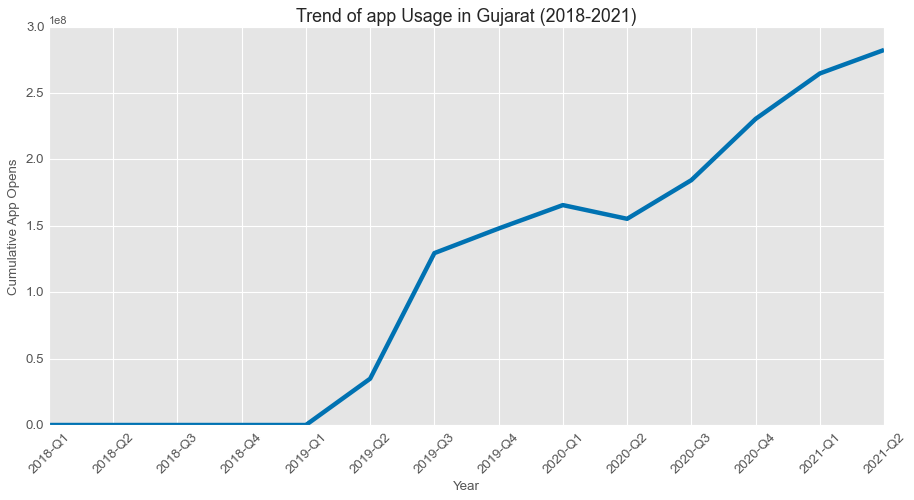

In [768]:
plt.figure(figsize = (12,6))
plt.style.use('seaborn-v0_8-colorblind')
plt.plot(gujarat_data['X-tick'],gujarat_data['App Opens'])
plt.title("Trend of app Usage in Gujarat (2018-2021)", fontsize = 16)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Cumulative App Opens", fontsize = 12)
plt.xticks(rotation= 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

**1. Rapid Growth Post-2019**  
A sharp rise in cumulative app opens is evident from mid-2019 onwards, indicating a surge in digital payment adoption.  
This could be attributed to increased smartphone penetration, improved internet connectivity, or successful marketing campaigns.  

**2. Impact of Pandemic (2020)**  
The steep growth in 2020 Q3 and Q4 could be linked to the COVID-19 pandemic, driving contactless payments and digital transactions.  
Businesses should continue leveraging this behavioral shift by offering cashless options and promoting in-app services.  

**3. Seasonal and Economic Trends**  
Minor dips or slower growth in early 2020 may indicate reduced spending or economic uncertainty.  
Companies can analyze seasonal patterns to optimize marketing campaigns during peak usage periods.  

**4. Competitive Advantage**  
PhonePe's sustained growth suggests strong brand recognition and customer loyalty.  
To maintain its edge, the company could introduce loyalty rewards, personalized offers, or expanded financial services like loans or insurance.  

**5. Expansion Opportunities**  
With consistent upward growth, further expansion into rural or semi-urban areas may unlock untapped markets.  
Partnering with local merchants and promoting digital literacy can enhance market penetration.  

#### Bar chart showing the distribution of transaction types for each state for the most recent quarter

In [315]:
state_txn_type.groupby('Year')['Quarter'].max()

Year
2018    4
2019    4
2020    4
2021    2
Name: Quarter, dtype: int64

In [319]:
data = state_txn_type[(state_txn_type['Year'] == 2021) & (state_txn_type['Quarter'] == 2)]
data = data.groupby(['State','Transaction Type']).agg({'Transactions':'sum'}).reset_index()

In [321]:
data_pivot = data.pivot(index = 'State', columns = 'Transaction Type', values = 'Transactions')

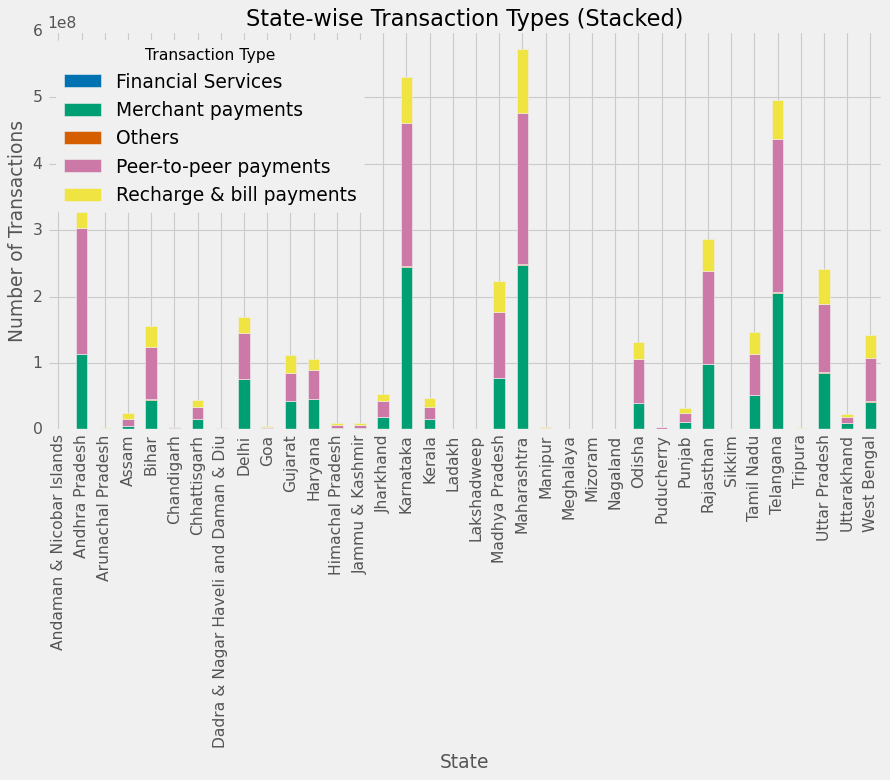

In [740]:
data_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.style.use('seaborn-v0_8-colorblind')
plt.ylabel("Number of Transactions")
plt.xlabel("State")
plt.title("State-wise Transaction Types (Stacked)")
plt.legend(title="Transaction Type", loc='best')
plt.xticks(rotation=90)
plt.show()

**1. High Transaction Volume States**  
Maharashtra, Karnataka, and Uttar Pradesh lead in total transactions, indicating strong digital adoption.  
Prioritizing further fintech services in these states could generate higher revenues.  

**2. Dominance of Peer-to-Peer (P2P) Payments**  
P2P payments (pink bars) are significant across most states, suggesting users prefer PhonePe for transferring money.  
Promoting secure and fast transfer features or introducing cashback on P2P transfers may further drive usage.  

**3. Merchant Payments on the Rise**  
States like Karnataka, Maharashtra, and Tamil Nadu show a notable share of merchant payments (blue bars).  
Expanding partnerships with local retailers and offering incentives for digital payments could enhance market penetration.  

**4. Regional Preferences in Financial Services**  
Financial services (red bars) are relatively smaller, indicating room for growth in investments, insurance, and loans.  
PhonePe could target high-income states like Delhi, Gujarat, and Maharashtra with financial product promotions.  

**5. Recharge and Bill Payments**  
States like Andhra Pradesh, Telangana, and Bihar show higher reliance on recharge and bill payments (yellow bars).  
This suggests that PhonePe is a convenient utility payment solution. Additional loyalty programs could retain users.  

#### Identifying the unique mapping between district names and district codes and exporting it to .csv

In [334]:
unique_mapping = district_txn[['District','Code']]
unique_mappings = unique_mapping.drop_duplicates()
unique_mappings.to_csv('unique_mapping.csv', index = False)

## 3. Data Quality Checks 

Data Quality Checks ensure that the data used for analysis, reporting, and decision-making is accurate, consistent, and reliable. Poor data quality can lead to incorrect conclusions, faulty analysis, and misguided business decisions.

#### Calculating total number of transactions, total transaction amount, and total registered users for each state through district_txn dataset

In [351]:
district_level_data = district_txn.groupby('State')[['Transactions','Amount (INR)','Registered Users']].sum().reset_index()
state_level_data = state_txn.groupby('State')[['Transactions','Amount (INR)','Registered Users']].sum().reset_index()

#### Comparing the results with the corresponding values at the state level

In [359]:
comparison_data = pd.merge(state_level_data, district_level_data, on = 'State', how = 'inner')
print("Mismatching records:\n")
comparison_data[(comparison_data['Transactions_x']!=comparison_data['Transactions_y']) |
                (comparison_data['Amount (INR)_x']!=comparison_data['Amount (INR)_y']) |
                (comparison_data['Registered Users_x']!=comparison_data['Registered Users_y'])]

Mismatching records:



,State,Transactions_x,Amount (INR)_x,Registered Users_x,Transactions_y,Amount (INR)_y,Registered Users_y
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396,1223565,3.641818e+09,408396
1,Andhra Pradesh,1781091169,3.187847e+12,158007957,1781091169,3.860292e+12,158007957
2,Arunachal Pradesh,8043799,2.225183e+10,1862214,8043799,2.225183e+10,1862214
3,Assam,123577981,2.814087e+11,26860751,123577981,2.814087e+11,26860751
4,Bihar,713643889,1.639579e+12,115284760,713643889,1.639579e+12,115284760
5,Chandigarh,25516542,5.371208e+10,3801466,25516542,5.371208e+10,3801466
6,Chhattisgarh,241908549,4.156353e+11,37448388,241908549,4.156353e+11,37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112,12462185,1.865878e+10,2701112
8,Delhi,1011031124,1.649942e+12,95374654,1011031124,1.649942e+12,95374654
9,Goa,24481604,4.427187e+10,4755320,24481604,4.427187e+10,4755320


## 4. Data Merging and Advanced Analysis

#### Calculating the ratio of registered PhonPe users to the population for each state

In [367]:
population_data = district_demo.groupby('State').agg({'Population':'sum'})
registered_users_data = state_txn.groupby('State').agg({'Registered Users':'sum'})
merged_data = pd.merge(population_data,registered_users_data, on ='State')
merged_data['Users/Population Ratio'] = merged_data['Registered Users']/merged_data['Population']
merged_data = merged_data.sort_values(by = 'Users/Population Ratio', ascending = False).reset_index()

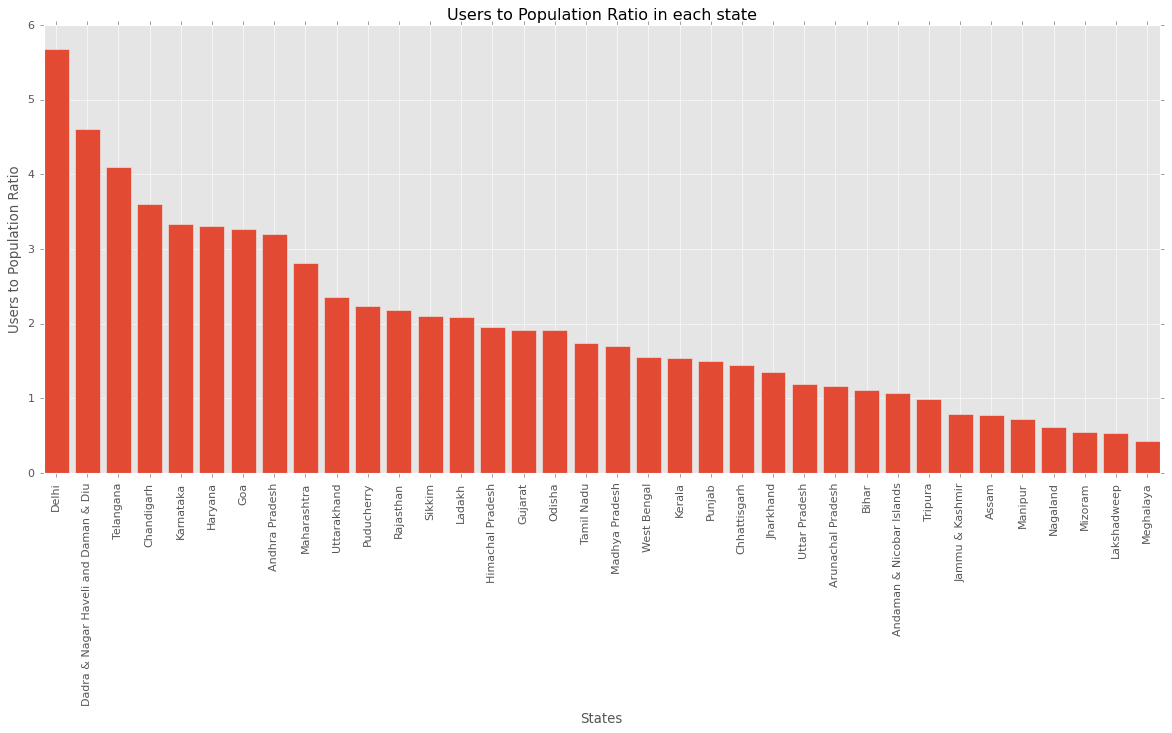

In [369]:
plt.style.use('ggplot')
plt.figure(figsize = (18,7))
plt.bar(merged_data['State'], merged_data['Users/Population Ratio'])
plt.title("Users to Population Ratio in each state")
plt.xlabel("States")
plt.ylabel("Users to Population Ratio")
plt.xticks(rotation= 90)
plt.show()

**1. High Digital Penetration in Urban Areas**  
Delhi has the highest user-to-population ratio, suggesting a high concentration of digital users, likely due to urbanization and better connectivity.  

**2. Union Territories Outperform Many States**  
Dadra & Nagar Haveli and Daman & Diu and Chandigarh also show high ratios. Union Territories often have better digital access and infrastructure.  

**3. Tech-Savvy Southern States**  
States like Telangana and Karnataka rank high, reflecting the presence of major IT hubs and higher digital literacy.  

**4. Lower Digital Penetration in Northeastern and Smaller States**  
Meghalaya, Mizoram, and Nagaland have a low user-to-population ratio, indicating either limited access to digital services or lower internet adoption.  

**5. Growth Potential in Large Population States**  
Uttar Pradesh and Bihar have a low user-to-population ratio. These populous states present significant opportunities for further digital expansion.  

#### Correlating population density with transaction volume

In [775]:
district_data = pd.merge(district_txn, district_demo, on = ['State','District','Code'], how = 'inner')
correlation = district_data['Transactions'].corr(district_data['Density'])
print("Correlation between transaction volumes and popoulation density: ", np.round(correlation*100,2), "%")

Correlation between transaction volumes and popoulation density:  30.77 %


In [374]:
district_data[['Density', 'Transactions']].corr()

,Density,Transactions
Density,1.000000,0.307704
Transactions,0.307704,1.000000


#### Scatter plot to visualize the correlation between population density and transaction volume

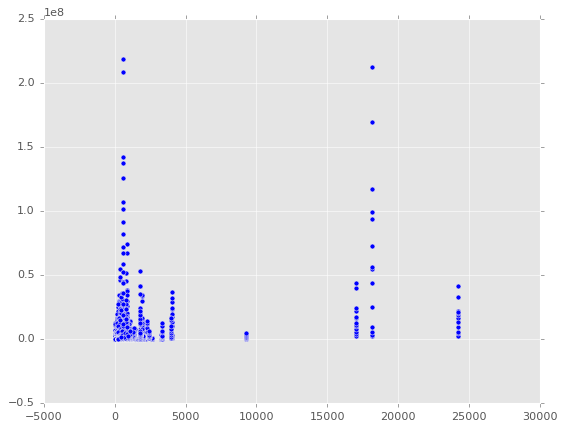

In [401]:
plt.scatter(district_data['Density'], district_data['Transactions'])

**Highly Skewed Distribution:**  
Most of the data points are clustered towards lower density values (left side of the x-axis).  
This suggests that a majority of districts have low population density.  

**Sparse High-Density Areas:**  
There are a few districts with high density (>10,000 people per unit area), but these are not consistently associated with high transaction volumes.  

**Transaction Concentration in Low-Density Areas:**  
Many high transaction values appear even at low population densities.  
This could mean that transaction volume is not strongly dependent on population density.  

**Potential Outliers:**  
Some points have extremely high transaction volumes (~200 million) despite relatively low density.  
This could indicate commercial hubs or business districts where transaction volume is high despite a lower population.  

#### Identifying top and bottom 5 states based on average transaction amount per user

In [385]:
state_users_amount = state_txn.groupby('State').agg({'Amount (INR)':'sum'}).reset_index()
state_users_count = state_txn.groupby('State').agg({'Registered Users': 'sum'}).reset_index()
state_users = pd.merge(state_users_amount, state_users_count, on = 'State')

In [397]:
state_users['ATA per user'] = state_users['Amount (INR)']/state_users['Registered Users']
state_users.sort_values(by = 'ATA per user', ascending = False, inplace = True)
print("Top 5 states with highest ATV per user:\n",state_users.head(5))
print("\nTop 5 states with lowest ATV per user:\n",state_users.tail(5))

Top 5 states with highest ATV per user:
              State  Amount (INR)  Registered Users  ATA per user
31       Telangana  4.574246e+12         149224214  30653.509622
15       Karnataka  4.361396e+12         203098564  21474.282206
1   Andhra Pradesh  3.187847e+12         158007957  20175.233763
28       Rajasthan  2.625584e+12         149770064  17530.768707
8            Delhi  1.649942e+12          95374654  17299.587909

Top 5 states with lowest ATV per user:
                                    State  Amount (INR)  Registered Users  \
12                      Himachal Pradesh  9.786546e+10          13373980   
16                                Kerala  3.729599e+11          51267042   
7   Dadra & Nagar Haveli and Daman & Diu  1.865878e+10           2701112   
32                               Tripura  2.097051e+10           3661575   
18                           Lakshadweep  1.921587e+08             34223   

    ATA per user  
12   7317.601442  
16   7274.846690  
7    6907.8159

#### Calculating the average transaction amount per user for each state

In [406]:
avg_amt = state_txn.groupby('State').agg({'Amount (INR)' : 'sum', 'Registered Users' : 'sum'})

In [411]:
avg_amt['Avg Amount'] = avg_amt['Amount (INR)']/avg_amt['Registered Users']
avg_amt.sort_values(by = 'Avg Amount', ascending = False, inplace = True)

#### Top 5 states with the highest and lowest average transaction amount per user

In [413]:
print("Top 5 states with highest average transaction amount per user:\n", avg_amt.head(5))

Top 5 states with highest average transaction amount per user:
                 Amount (INR)  Registered Users    Avg Amount
State                                                       
Telangana       4.574246e+12         149224214  30653.509622
Karnataka       4.361396e+12         203098564  21474.282206
Andhra Pradesh  3.187847e+12         158007957  20175.233763
Rajasthan       2.625584e+12         149770064  17530.768707
Delhi           1.649942e+12          95374654  17299.587909


In [415]:
print("Top 5 states with lowest average transaction amount per user:\n", avg_amt.tail(5))

Top 5 states with lowest average transaction amount per user:
                                       Amount (INR)  Registered Users  \
State                                                                  
Himachal Pradesh                      9.786546e+10          13373980   
Kerala                                3.729599e+11          51267042   
Dadra & Nagar Haveli and Daman & Diu  1.865878e+10           2701112   
Tripura                               2.097051e+10           3661575   
Lakshadweep                           1.921587e+08             34223   

                                       Avg Amount  
State                                              
Himachal Pradesh                      7317.601442  
Kerala                                7274.846690  
Dadra & Nagar Haveli and Daman & Diu  6907.815954  
Tripura                               5727.184275  
Lakshadweep                           5614.898889  


#### Ratio of users using each device brand to the total number of registered users in each state

In [418]:
brand_usage = pd.merge(state_txn, state_device_data, on = ['State','Year','Quarter'], how = 'inner')

In [505]:
brand_usage = brand_usage.rename(columns = {'Registered Users_x':'Total Users', 'Registered Users_y' : 'Brand Users'})
brand_usage = brand_usage.groupby(['State','Brand']).agg({'Total Users' : 'sum', 'Brand Users' : 'sum'}).reset_index()
brand_usage['Usage%'] = np.round((brand_usage['Brand Users']/brand_usage['Total Users'])*100, 2)

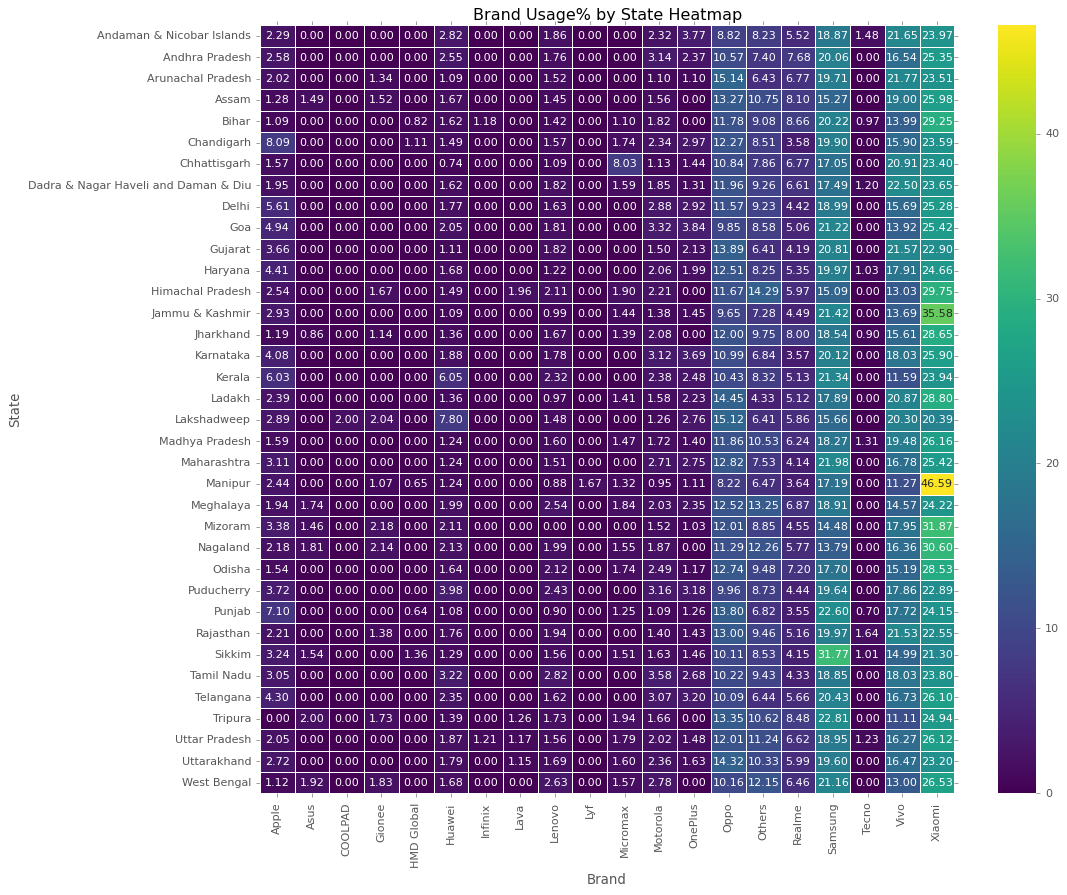

In [502]:
brand_usage_pivot = brand_usage.pivot(index = 'State', columns = 'Brand', values = 'Usage%')
brand_usage_pivot = brand_usage_pivot.fillna(0)
plt.figure(figsize=(14, 12))
sns.heatmap(brand_usage_pivot, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5)
plt.title('Brand Usage% by State Heatmap')
plt.show()

**1. Xiaomi's Dominance**  
Xiaomi maintains its dominance across multiple states, especially in regions like Bihar, Uttar Pradesh, and West Bengal where the brand's affordability and wide range appeal to a larger population.  
The bright yellow blocks on the far-right side indicate Xiaomi's significantly high market share in certain states (like Manipur, J&K and Bihar).  

**2. Regional Preferences**  
Vivo and Samsung are consistently the next most popular brands, but their dominance varies by region.  
Samsung has a relatively stronger presence in states like Sikkim, Delhi, Kerala, and Tamil Nadu.  
Vivo also shows high brand usage across several states.  

**3. Limited Presence of Niche Brands**  
Brands like Infinix, Gionee, and COOLPAD have negligible market share across most states, indicated by the dark purple blocks.  
Apple also shows low penetration, which is expected given its premium pricing, although it has a slightly higher share in metropolitan areas like Kerala, Punjab, Chandigarh.  

**4. Brand Concentration**  
Some states, such as Nagaland, Manipur, and Meghalaya, show greater diversity with more evenly distributed brand usage compared to states like Bihar and Uttar Pradesh where one or two brands dominate.  
Others category (possibly comprising local or lesser-known brands) shows significant market share in several states.  

**5. Market Opportunities**  
Brands with low adoption rates might have opportunities to increase their market share by targeting regions with low competition.  
Apple and OnePlus show lower presence, possibly indicating opportunities in premium segments.  


## 5. Data Visualization

Data visualization simplifies complex data, revealing patterns, trends, and insights. It aids decision-making, enhances communication, and makes data interpretation accessible and intuitive.

#### Line plot showing the total number of transactions and the total transaction amount over time (years and quarters) for Kerala 

In [518]:
kerala_data = state_txn[state_txn['State']=='Kerala']

In [524]:
kerala_data['Xtick'] = kerala_data['Year'].astype(str) + '-Q' + kerala_data['Quarter'].astype(str)
kerala_data.groupby('Xtick').agg({'Transactions' : 'sum', 'Amount (INR)' : 'sum'})
kerala_data

C:\Users\TULIKA\AppData\Local\Temp\ipykernel_2080\845154216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kerala_data['Xtick'] = kerala_data['Year'].astype(str) + '-Q' + kerala_data['Quarter'].astype(str)


,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,Xtick
224,Kerala,2018,1,1771380,2.402675e+09,1356.385842,784184,0,2018-Q1
225,Kerala,2018,2,2308165,3.886923e+09,1683.988512,1066587,0,2018-Q2
226,Kerala,2018,3,3134348,5.323025e+09,1698.287881,1347598,0,2018-Q3
227,Kerala,2018,4,4310654,7.747361e+09,1797.258893,1757326,0,2018-Q4
228,Kerala,2019,1,6469039,1.023503e+10,1582.156350,2136624,0,2019-Q1
229,Kerala,2019,2,7283826,1.303137e+10,1789.083314,2550167,8673220,2019-Q2
230,Kerala,2019,3,9286096,1.642981e+10,1769.291392,2990963,31471694,2019-Q3
231,Kerala,2019,4,12498637,2.115133e+10,1692.290658,3503938,40046033,2019-Q4
232,Kerala,2020,1,15733522,2.645108e+10,1681.192859,4078316,46396398,2020-Q1
233,Kerala,2020,2,16287967,2.589408e+10,1589.767371,4728844,45832953,2020-Q2


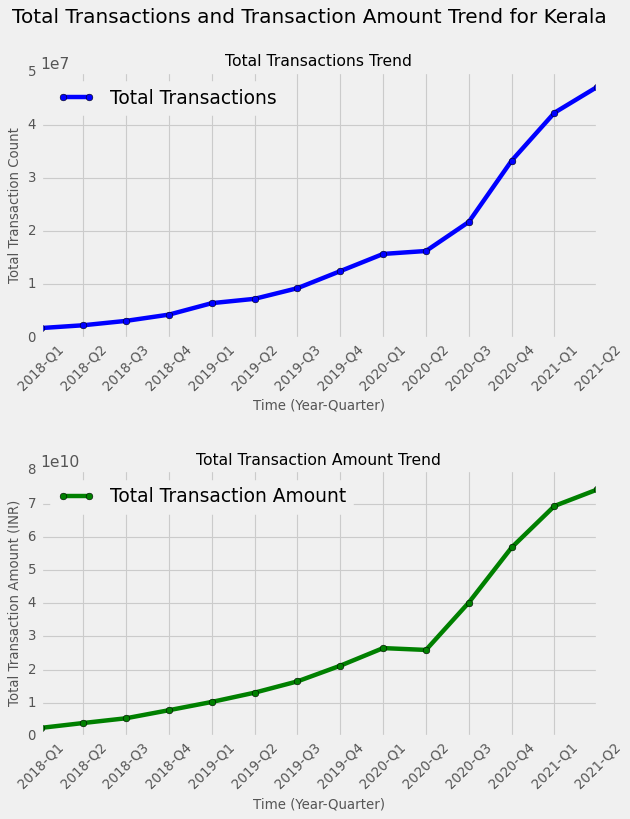

In [593]:
plt.figure(figsize=(8, 10))
plt.style.use('seaborn-v0_8-colorblind')

# Plotting Total Transactions
plt.subplot(2, 1, 1)
plt.plot(kerala_data['Xtick'], kerala_data['Transactions'], marker='o', label='Total Transactions', color='blue')
plt.xlabel("Time (Year-Quarter)", fontsize = 12)
plt.ylabel("Total Transaction Count", fontsize = 12)
plt.title("Total Transactions Trend", fontsize = 14)
plt.xticks(rotation=45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc='upper left')
plt.grid(True)

# Plotting Total Transaction Amount
plt.subplot(2, 1, 2)
plt.plot(kerala_data['Xtick'], kerala_data['Amount (INR)'], marker='o', label='Total Transaction Amount', color='green')
plt.xlabel("Time (Year-Quarter)", fontsize = 12)
plt.ylabel("Total Transaction Amount (INR)", fontsize = 12)
plt.title("Total Transaction Amount Trend", fontsize = 14)
plt.xticks(rotation=45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc='upper left')
plt.grid(True)

plt.suptitle("Total Transactions and Transaction Amount Trend for Kerala", fontsize=18)
plt.subplots_adjust(hspace=0.5)

plt.show()

**1. Strong Growth Trend**  
Both the transaction count and transaction amount have shown consistent growth from 2018 to 2021.  
The sharp increase post 2020-Q2 could be attributed to the pandemic, accelerating digital payments adoption.  

**2. Increased Trust and Usage**  
The proportional rise in transaction amount alongside the transaction count suggests increased user trust in PhonePe for higher-value transactions.  
Introducing additional financial services like loans, credit, and insurance could capitalize on this trend.  

**3. Market Expansion Opportunity**  
The exponential growth from 2020-Q3 indicates PhonePe's expanded reach and customer acquisition success.  
Continued partnerships with businesses and merchants in Tier 2 and Tier 3 cities can further sustain this momentum.  

**4. Seasonal and Campaign Impact**  
Noticeable spikes during Q4 2020 and Q1 2021 could be linked to festive seasons or promotional campaigns.  
Strategically planning offers during festive periods can maximize engagement and revenue.  

**5. High Growth Potential**  
Despite rapid growth, PhonePe's adoption is likely still expanding, especially in regions with lower digital penetration.  
Investing in regional marketing, multilingual support, and simplified user experiences can capture further market share.  

#### Pie chart showing the distribution of transaction types for a specific quarter

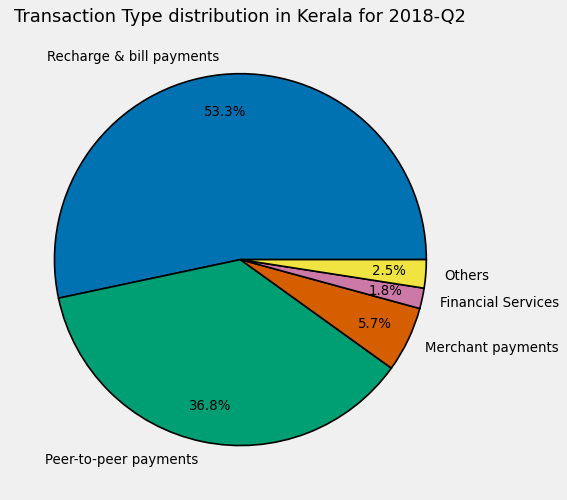

In [597]:
kerala_txn = state_txn_type[(state_txn_type['State']=='Kerala') & (state_txn_type['Year']==2018) & (state_txn_type['Quarter']==2)]
plt.style.use("seaborn-v0_8-colorblind")
plt.figure(figsize=(18,7))
plt.pie(kerala_txn['Transactions'], labels = kerala_txn['Transaction Type'], 
        autopct = '%1.1f%%',
        labeldistance=1.1, 
        pctdistance=0.8,
        textprops={'fontsize': 12},
        wedgeprops = {'edgecolor':'black', 'linewidth':1.5})
plt.title("Transaction Type distribution in Kerala for 2018-Q2", fontsize = 16)
plt.show()

**Recharge & Bill Payments Dominance:**  

53.3% of the transactions are Recharge & Bill Payments, indicating that users in Kerala heavily rely on digital platforms for their utility payments.  
This may indicate strong digital adoption for recurring expenses like mobile recharges, electricity bills, and water bills.  
                                         
**Significant Peer-to-Peer Payments:**  

36.8% of the transactions are Peer-to-Peer Payments (P2P), suggesting a growing preference for digital money transfers among individuals, possibly using UPI or wallet-based systems.  


**Low Merchant Payments:**  

5.7% of transactions involve Merchant Payments, reflecting lower digital adoption for purchasing goods or services.  
This could indicate a reliance on cash transactions or limited digital payment acceptance among merchants.  


**Minimal Financial Service Transactions:**  

Only 1.8% of transactions are for Financial Services, which might include investments, loan payments, or insurance.  
There is potential to grow financial service-related transactions by increasing customer awareness and trust.  


**Others Category:**  

2.5% fall under the Others category, suggesting minor transactions that may not fit into the other defined categories.  


**Business Recommendations:**  
- Promote Merchant Adoption: Incentivize more businesses to accept digital payments using UPI or QR codes.  
- Expand Financial Services: Launch targeted campaigns promoting financial products through digital channels.  
- Leverage P2P Growth: Offer referral programs or cashback to further grow peer-to-peer payment adoption.  

#### Bar plot showing the population density of districts in a selected state 

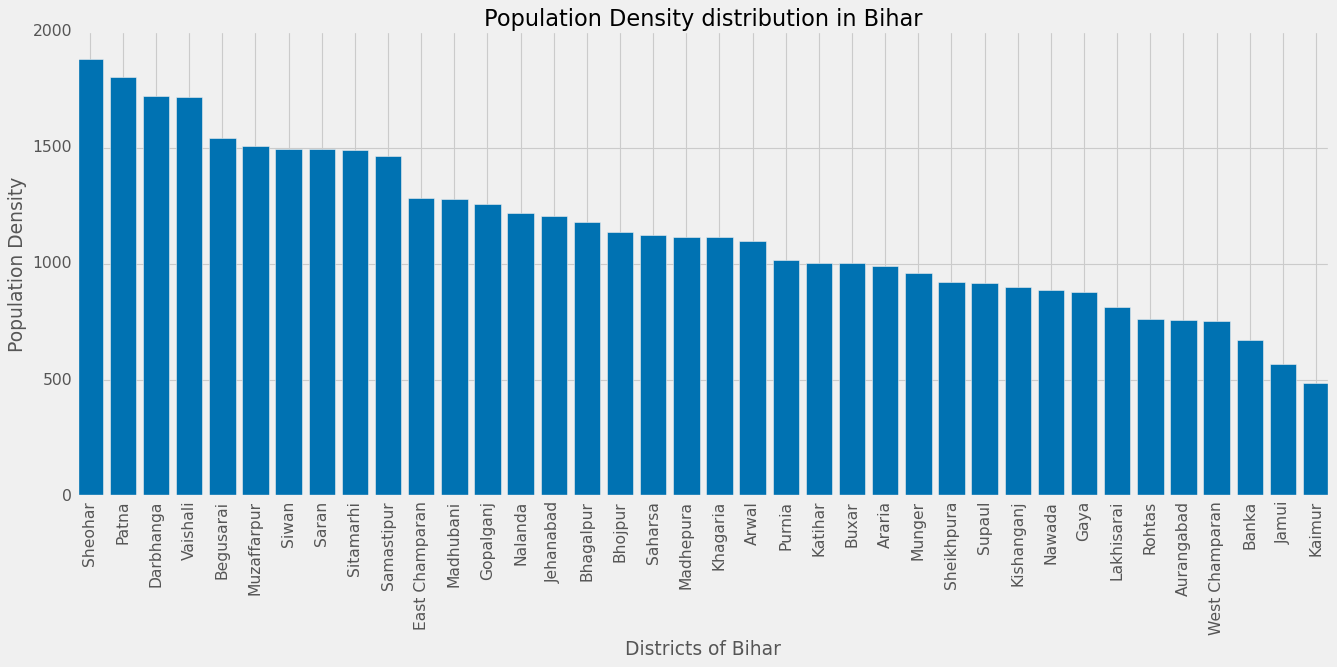

In [616]:
bihar_txn = district_demo[district_demo['State']=='Bihar']
bihar_txn = bihar_txn.groupby('District').agg({'Density':'sum'}).sort_values(by='Density', ascending = False).reset_index()

plt.figure(figsize = (18,7))
plt.style.use("seaborn-v0_8-colorblind")
plt.bar(bihar_txn['District'], bihar_txn['Density'])
plt.xlabel("Districts of Bihar")
plt.ylabel("Population Density")
plt.title('Population Density distribution in Bihar')
plt.xticks(rotation=90)
plt.show()

**1. High Population Density in Sheohar and Patna:** 
Sheohar and Patna have the highest population densities, indicating urbanization and economic activity concentration. Patna, as the capital city, is expectedly dense.  

**2. Disparity in Population Distribution:** 
There is a sharp decline in population density as we move from urban to rural districts, highlighting regional imbalances in population concentration.  

**3. Potential for Infrastructure Development:** 
Districts like Vaishali, Darbhanga, and Muzaffarpur also have significant densities, suggesting a need for infrastructure upgrades and urban planning.  

**4. Lower Density in Kaimur and Jamui:** 
The low population density in these districts might indicate limited economic opportunities, lower industrial presence, or geographic constraints.  

**5. Policy and Resource Allocation:** 
High-density districts may require more robust public service delivery, including housing, sanitation, and transport infrastructure, compared to low-density regions that may benefit from rural development programs.  

## 6. Data insights and conclusion

Data insights guide decision-making, optimize resource allocation, support infrastructure planning, boost economic growth, and ensure effective disaster management for balanced regional development and progress.

#### Identify any noticeable trends or patterns

In [626]:
corr = district_data['Transactions'].corr(district_data['Population'])
print("Correlation between transaction volumes and population: ", np.round(corr*100,2), "%")

Correlation between transaction volumes and population:  35.92 %


In [676]:
brand_user = state_device_data.groupby(['Year','Brand']).agg({'Registered Users':'sum'}).sort_values(by=['Year','Registered Users'], ascending = [True,False]).reset_index()
brand_user = brand_user[(brand_user['Brand'] == 'Xiaomi') | (brand_user['Brand'] == 'Vivo') | (brand_user['Brand'] == 'Samsung')]

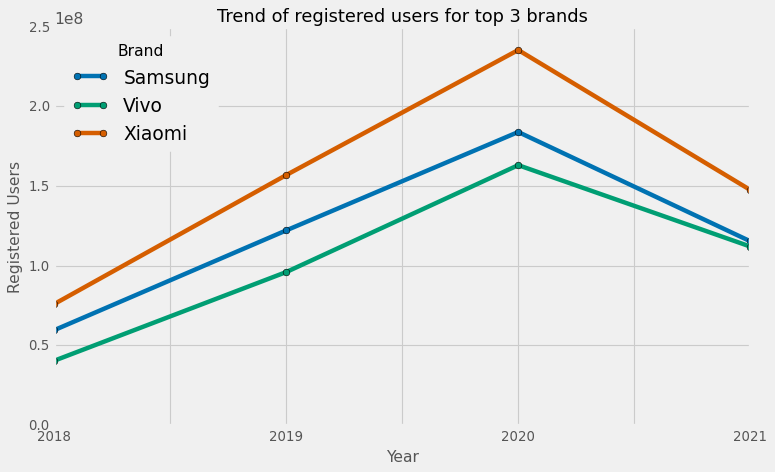

In [708]:
brand_user_pivot = brand_user.pivot(index = 'Year', columns = 'Brand', values = 'Registered Users')
brand_user_pivot.index = brand_user_pivot.index.astype(str)
brand_user_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Trend of registered users for top 3 brands', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Registered Users', fontsize = 14)
plt.legend(title="Brand", loc='best')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

**Consistent Growth Until 2020**  
All three brands (Samsung, Vivo, and Xiaomi) showed consistent growth in registered users from 2018 to 2020, peaking in 2020.  

**Xiaomi's Dominance**    
Xiaomi consistently had the highest number of registered users compared to Samsung and Vivo, maintaining a competitive edge.  

**Sharp Decline in 2021**  
There was a significant drop in registered users for all three brands in 2021, possibly indicating market saturation or external factors like economic downturn or changing consumer preferences.  

**Steady Competition**  
Samsung maintained its position as the second most popular brand, followed closely by Vivo. The relative positioning of the brands remained stable.  


### Key Findings 

**1. Steady Growth Until 2020:**  
PhonePe saw significant growth in transactions and registered users from 2018 to 2020, with a notable peak in 2020.  
Transaction values and the number of app opens also followed an upward trajectory.  

**2. Regional Variations:**  
Some states and districts showed higher engagement with PhonePe, indicated by larger transaction volumes and user registration.  
High-density areas typically recorded higher transaction values, likely due to urban financial activity.  

**3. Device Usage Insights:**  
A significant proportion of users accessed PhonePe through smartphones, with Android dominating over iOS.  
Regions with lower smartphone penetration showed slower adoption rates.  

**4. Drop in Transactions in 2021:**  
There was a notable decline in transactions and registered users in 2021, possibly due to market saturation or the impact of the pandemic.  

**5. Average Transaction Value (ATV) Trends:**  
The ATV fluctuated across different states and quarters, with metropolitan regions exhibiting higher transaction values. 

### Actionable Insights for PhonePe 

**1. Localized Marketing Campaigns:**  
Focus on states and districts with lower penetration through targeted marketing campaigns. Collaborate with regional merchants to increase adoption.  

**2. Incentivize High ATV Users:**  
Implement loyalty programs for users in regions with higher average transaction values to encourage repeat transactions.  

**3. Device Optimization:**  
Improve the app experience on both Android and iOS devices. Consider partnerships with phone manufacturers for pre-installed apps in emerging regions.  

**4. Reviving Growth in 2021 and Beyond:**  
Investigate the reasons behind the drop in 2021 and run customer retention programs. Offer incentives like cashback or discounts to re-engage dormant users.  

**5. Data-Driven Product Expansion:**  
Use demographic insights to introduce financial products like micro-loans, insurance, or investment plans that cater to user needs in specific regions. 

### 2021 user dip

**1. Intense Competition** 

**- Market Saturation:** By 2021, many users had already adopted digital payment platforms, resulting in slower user acquisition for PhonePe.  
**- Aggressive Marketing by Competitors:** Paytm, Google Pay, and Amazon Pay launched aggressive cashback offers, rewards programs, and strategic partnerships, luring users away from PhonePe.  
**- Exclusive Partnerships:** Competitors often formed exclusive partnerships with popular merchants and platforms, limiting PhonePe's access.  


**2. Regulatory and Policy Changes**  

**- NPCI's Market Cap Rule:** The National Payments Corporation of India (NPCI) introduced a 30% market cap on UPI transactions for third-party app providers, affecting companies like PhonePe and Google Pay.  
**- KYC Norms:** Stricter Know Your Customer (KYC) regulations may have impacted onboarding rates, especially in regions with limited digital literacy.  


**3. Consumer Preferences and Loyalty Shifts**  

**- Multi-Platform Users:** Many consumers diversified their payment habits across multiple platforms based on cashback offers, transaction ease, or merchant preference.  
**- App-Specific Features:** Competitors introduced specialized features like wealth management (Paytm Money) or additional cashback on specific transactions, pulling users away.  


**4. Economic and Pandemic Impact**  

**- Reduced Spending:** The economic downturn caused by the pandemic may have led to a reduction in non-essential spending, impacting overall transaction volume.  
**- Shift to Offline Payments:** As restrictions eased in 2021, cash payments may have increased, reducing reliance on digital wallets.  


**Next Steps for PhonePe-**

1. Conduct customer feedback surveys to identify churn reasons.
2. Launch competitive campaigns targeting inactive users.
3. Diversify offerings into financial services like lending, insurance, or wealth management.
4. Strengthen partnerships with offline retailers to increase acceptance.